> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# **IS 4487 LAB 5: EDA**

## Outline

- Data quality checks: data types, missing values, duplicates and outliers
- Descriptive statistics
- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

This lab uses the same dataset from **Lab 4**. Data on Bay Area Craigslist rental housing posts.

Source: Pennington, Kate (2018). Bay Area Craigslist Rental Housing Posts, 2000-2018.


**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## **Part 1: Import libraries, and the Data, and preview the Data**

### Instructions:
- Import the `pandas` library.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `df.shape`, `df.info()` and `df.head()` to inspect the structure and preview the data.

In [1]:
# import any libraries that you wish to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [2]:
df.shape

(200796, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [4]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## **Part 2: Data quality checks -Inspect and Fix issues**

### Instructions:
- Check data types (e.g., dates, numeric columns, strings) and fix problems
- Identify duplicates
- Check for outliers in key numeric variables like the target `price`, and others such as `sqft`, `beds`, or `baths`.
- Identify missing values.




### 2.1 Check data types

### **🔧 Try It Yourself – Part 2.1**

1. Use a command to view the data types
2. Convert `nhood`, `city` and `county` to categorical type
3. Convert `date` to datetime type

In [38]:
# write your code here to view datatypes
print(df.dtypes)

# convert strings nhood, city and county to category
df['nhood'] = df['nhood'].astype('category')
df['city'] = df['city'].astype('category')
df['county'] = df['county'].astype('category')

# convert date to datetime
df['date'] = df['date'].astype('datetime64[ns]')

post_id                object
date           datetime64[ns]
year                    int64
nhood                category
city                 category
county               category
price                   int64
beds                  float64
baths                 float64
sqft                  float64
room_in_apt             int64
address                object
lat                   float64
lon                   float64
title                  object
descr                  object
details                object
dtype: object


### 2.2 Check duplicates

### **🔧 Try It Yourself – Part 2.2**

In [47]:
# write your code here to count exact duplicates
df.duplicated().sum()

np.int64(0)

### 2.3 Check outliers

in price and remove them using the IQR rule that we have learned (keep if within Q1 - 1.5\*IQR and Q3+ 1.5\*IQR)

### **🔧 Try It Yourself – Part 2.3**

1. Remove/drop outliers in `price`
2. View the size of the new Dataframe, and assess how many rows have been removed.
3. Is this acceptable?


In [61]:
# write code here to remove price outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of price outliers using IQR: {len(outliers)}")
df.drop(outliers.index, inplace=True)



Number of price outliers using IQR: 10895


In [62]:
#check the size of the new Dataframe with no price outliers
df.shape

(189901, 17)

🔧 Is this acceptable? Add a comment here

### 2.4 Check missing values

### **🔧 Try It Yourself – Part 2.4**

You will see that our main target variable `price` has no missing values. That is good news. We wont need to do anything else here.

However most models will drop rows that have any missing values. Some columns have many missing values. We will see in the next lab how to optimally deal with missing values, which will depend on its data type.

In [63]:
# Check for missing values
df.isnull().sum()


,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1323
price,0
beds,6459
baths,150373
sqft,130869


## **Part 3: Basic Exploration using Descriptive statistics**




In [64]:
# Basic summary statistics for key numeric variables
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,189901.000000,183442.000000,39528.000000,59032.000000
mean,1894.258071,1.817359,1.623394,1113.182630
std,818.641963,1.027043,0.637269,5213.173539
min,220.000000,0.000000,1.000000,80.000000
25%,1250.000000,1.000000,1.000000,734.000000
50%,1750.000000,2.000000,1.500000,961.000000
75%,2400.000000,2.000000,2.000000,1255.000000
max,4320.000000,12.000000,6.000000,900000.000000


Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.

In [65]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

/tmp/ipython-input-2269547214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)


,price
nhood,
candlestick point,3011.316239
SOMA / south beach,2922.971689
financial district,2756.163873
cazadero,2700.000000
tiburon / belvedere,2679.587719
montara,2675.000000
half moon bay,2514.773810
potrero hill,2461.464251
pacific heights,2454.070280


In [66]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,49542
san jose,13514
oakland,9304
santa rosa,6206
santa cruz,5232
san mateo,5022
sunnyvale,4462
mountain view,4315
santa clara,4135


## **Part 4: Visualization using Univariate Analysis**

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables with potentially infinite values (`price`, `sqft`)
- Plot countplots for variables that are more categorical with limited number of values (`beds`, `nhood`)


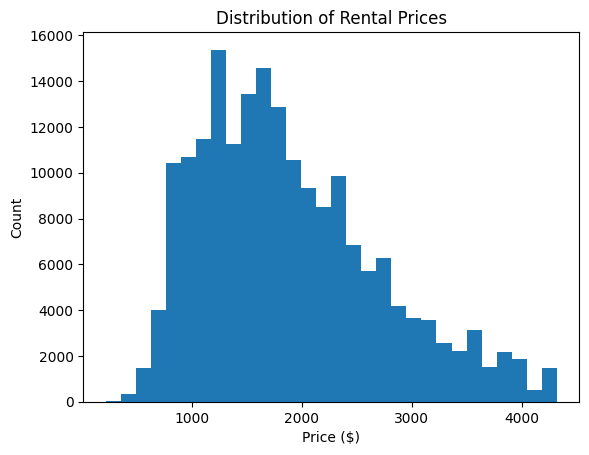

In [67]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

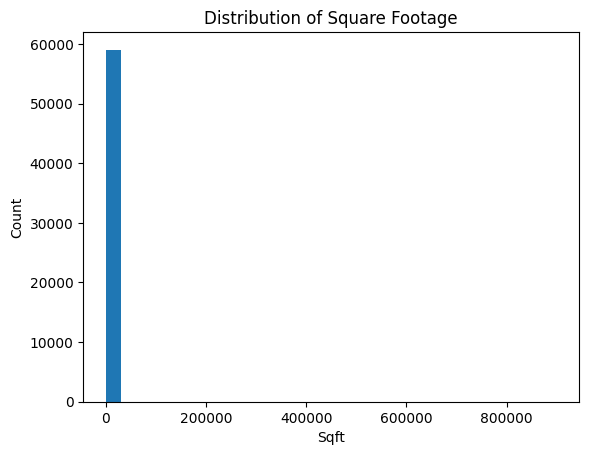

In [68]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


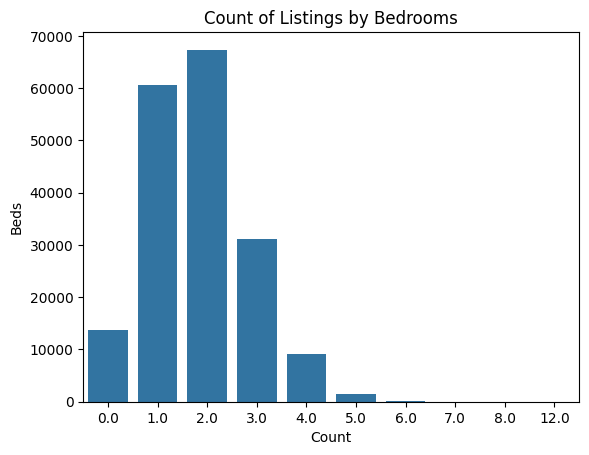

In [69]:
# Countplot for beds
sns.countplot(data=df, x='beds')
plt.title("Count of Listings by Bedrooms")
plt.xlabel("Count")
plt.ylabel("Beds")
plt.show()

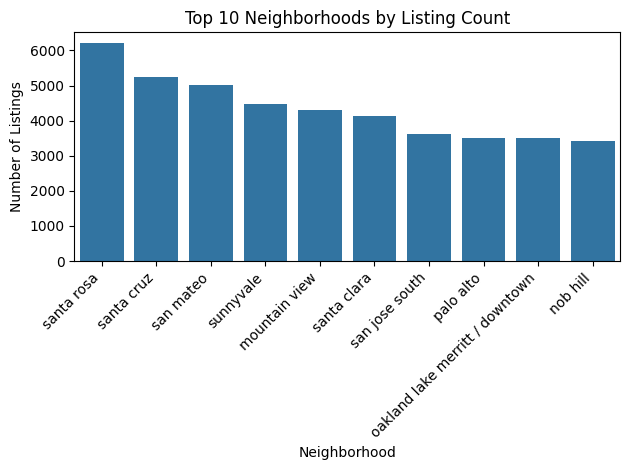

In [76]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

# we have 167 different neighborhoods stored as a categorical variable - lets remove the ones not in the top 10
top_nhoods.index = top_nhoods.index.remove_unused_categories()

# now plot a barplot
sns.barplot(x=top_nhoods.index, y=top_nhoods.values, order = top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **🔧 Try It Yourself – Part 4**

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

2. After creating the visuals, write 1–2 sentences explaining what you notice in each.


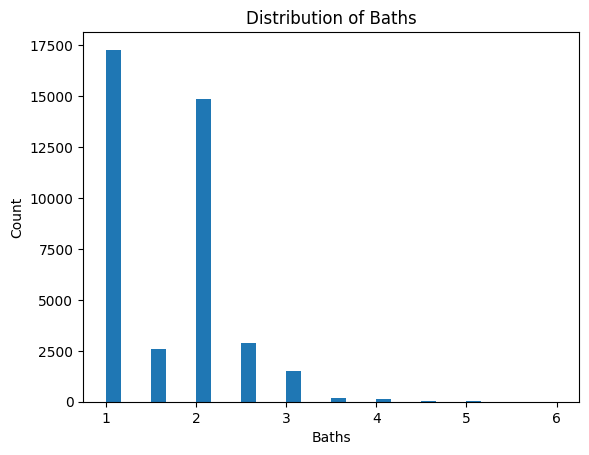

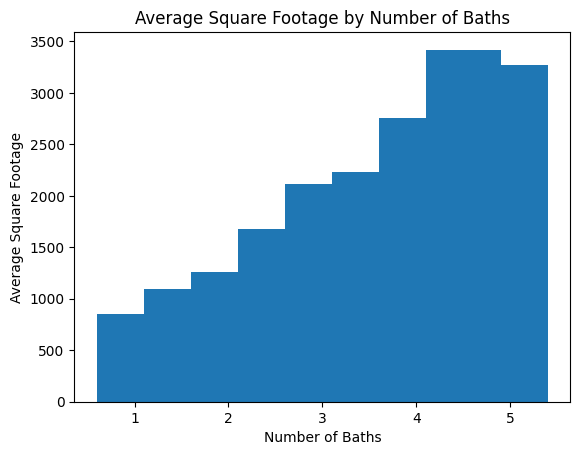

In [83]:
# Visual 1 🔧
plt.hist(df['baths'].dropna(), bins=30)
plt.title("Distribution of Baths")
plt.xlabel("Baths")
plt.ylabel("Count")
plt.show()

# Visual 2 🔧
plt.bar(df.groupby('baths')['sqft'].mean().index, df.groupby('baths')['sqft'].mean().values)
plt.title("Average Square Footage by Number of Baths")
plt.xlabel("Number of Baths")
plt.ylabel("Average Square Footage")
plt.show()

🔧 Visual 1 comment:

Based on visual 1, most listings appears to fall within the 1 & 2 baths; meaning, roughly 17,000 of the listed properties have one bath while 14,500 have two baths. Properties with 1.5 or >2.5 count for less than 5,000


🔧 Visual 2 comment:

As shown in visual 2, there's a positive relationship between the average sqft and number of baths. Listings with more baths has shown to have more average square footage, showing a positive correlation.

## **Part 5: Bivariate Analysis**

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [84]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.430454,0.366481,0.032313
beds,0.430454,1.000000,0.637700,0.674830
baths,0.366481,0.637700,1.000000,0.605949
sqft,0.032313,0.674830,0.605949,1.000000


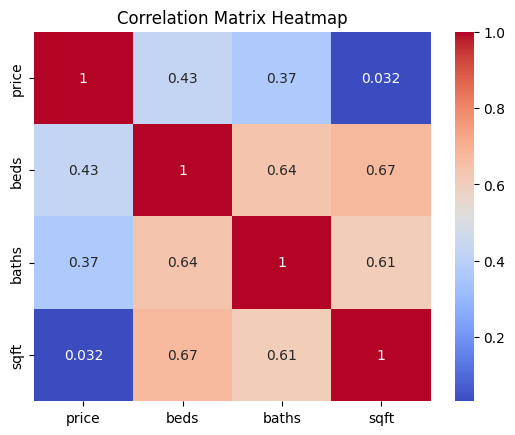

In [85]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

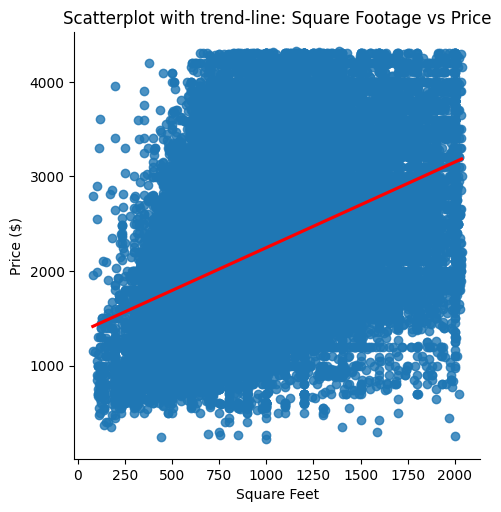

In [86]:
# Scatterplot with a trend line: Square Footage vs Price

# there is a huge outlier in sq footage (see max value is 900,000),
# if you make this plot without removing it, it will not be very useful
# try running it with and without the outliers - to see for yourself

# Remove outliers from sqft using IQR
Q1_sqft = df['sqft'].quantile(0.25)
Q3_sqft = df['sqft'].quantile(0.75)
IQR_sqft = Q3_sqft - Q1_sqft
df = df[((df['sqft'] >= (Q1_sqft - 1.5 * IQR_sqft)) & (df['sqft'] <= (Q3_sqft + 1.5 * IQR_sqft)))]

# now make a scatterplot with a trend line using seaborn's lmplot
sns.lmplot(x='sqft', y='price', data=df, line_kws={"color":"red"})
plt.title("Scatterplot with trend-line: Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

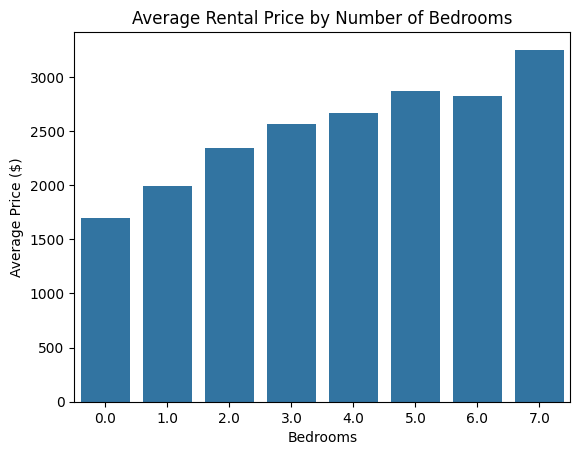

In [87]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### **🔧 Try It Yourself – Part 5**

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.
3. What trends or outliers do you see?

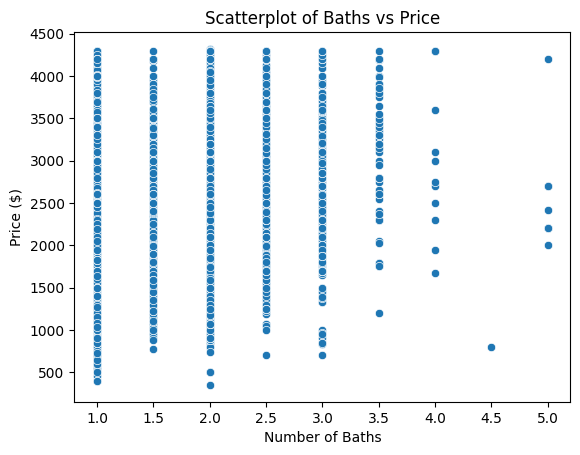

In [88]:
#1 🔧 Your code here
sns.scatterplot(x='baths', y='price', data=df)
plt.title("Scatterplot of Baths vs Price")
plt.xlabel("Number of Baths")
plt.ylabel("Price ($)")
plt.show()

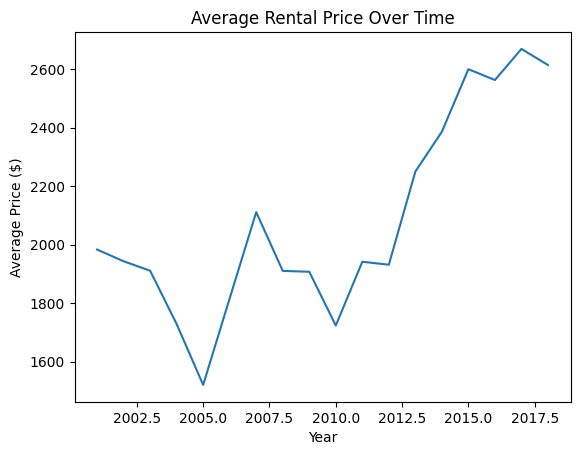

In [89]:
#2 🔧 Your code here
avg_price_by_year = df.groupby('year')['price'].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values)
plt.title("Average Rental Price Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.show()

***Answer 3***

Prices generally increase with more baths, but there are clear outliers—some very cheap units with multiple baths and some very expensive ones even with only 1–2 baths.

The average rental price dipped sharply around 2005–2010, then rose steadily after 2012, peaking around 2016–2017. Overall, the long-term trend shows strong growth in rental prices despite short-term fluctuations.

## 🔧  **Part 6: Reflection**

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

🔧 Add reflections here:

1. Based on the correlation matrix and heatmap in Part 5, beds and baths show the strongest positive correlation with price. sqft has a weaker positive correlation.

2. Yes, generally, as sqft increases, the price tends to increase (shown in the scatterplot in Part 5). Similarly, as the number of beds increases, the average price also increases (shown in the bar plot in Part 5).

3. From the grouped data in Part 3, you can see the neighborhoods with the highest average prices (e.g., candlestick point, SOMA / south beach, financial district). The plot of average price over time in Part 5 shows which years had the highest average rental prices (it seems to peak around 2016-2017).

4. To improve the analysis, you could consider:
Visualizing the distribution of sqft, beds, and baths without removing outliers to see their full range.
Grouping by city or county to see average prices or listing counts in those areas.
Creating scatterplots of beds vs price or baths vs price to see the relationship visually.


## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [90]:
!jupyter nbconvert --to html "lab_05_LastnameFirstname.ipynb"

[NbConvertApp] Converting notebook lab_05_LastnameFirstname.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 816162 bytes to lab_05_LastnameFirstname.html
